## Spaceship Titanic - Kaggle 

### Objetivo

- Predecir cual pasajero fue transportado a otra dimension.

### 1. Importando librerias y datos

In [35]:
# Importando librerias multiproposito
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Leyendo datos
X_train_full = pd.read_csv('./train.csv')
X_test_full = pd.read_csv('./test.csv')

In [22]:
X_train_full.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 2. Analisis Exploratorio de Datos (EDA)

In [23]:
# Cuales son las columnas del DataFrame?
X_train_full.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [24]:
# Que tamaño tienen los datos?
X_train_full.shape

(8693, 14)

In [25]:
# Hay valores nulos en los datos? 
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [26]:
# Cuantos valores nulos hay por caracteristica?
X_train_full.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
# Como se distribuyen ls variables numericas?
X_train_full.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [28]:
# Como se distribuyen las variables categoricas?
X_train_full.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [29]:
# Existen valores unicos?
X_train_full.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

#### 2.1 EDA: Estudio de la variable target

In [30]:
X_train_full.groupby(['Transported']).count()['PassengerId']

Transported
False    4315
True     4378
Name: PassengerId, dtype: int64

In [40]:
# Target vs VIP 
X_train_full.groupby(['Transported', 'VIP']).count()['PassengerId']

Transported  VIP  
False        False    4093
             True      123
True         False    4198
             True       76
Name: PassengerId, dtype: int64

In [33]:
grouped_vip = X_train_full.groupby(['Transported', 'VIP']).count()['PassengerId']
grouped_vip.unstack(level=0)

Transported,False,True
VIP,,
False,4093,4198
True,123,76


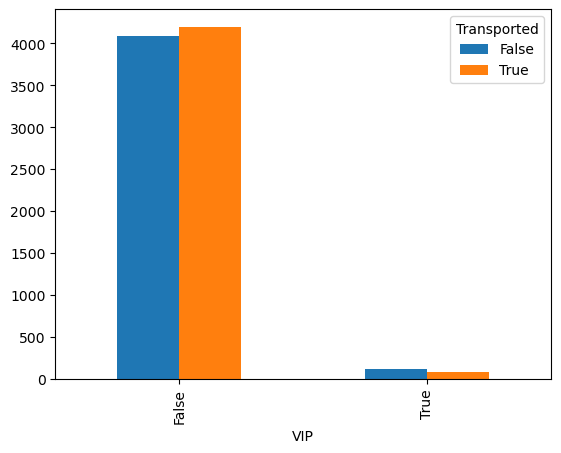

In [37]:
# sns.barplot(grouped_vip.unstack(level=0))
grouped_vip.unstack(level=0).plot.bar()
plt.show()

Aparentemente no hay mucha relacion entre la categoria VIP y si el pasajero fue Transportado o no

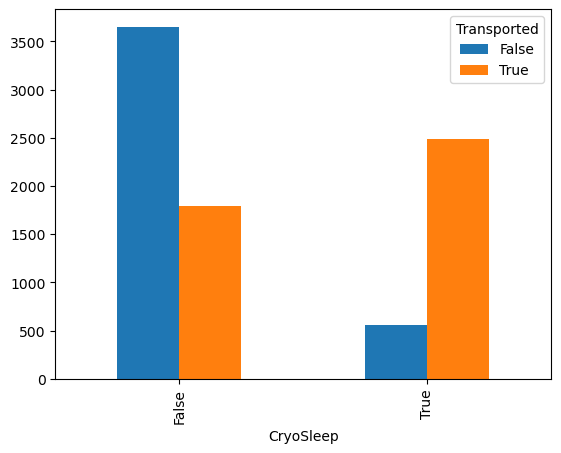

In [41]:
# Transported vs CryoSleep
X_train_full.groupby(['Transported', 'CryoSleep']).count()['PassengerId'].unstack(level=0).plot.bar()
plt.show()

<Axes: xlabel='Destination'>

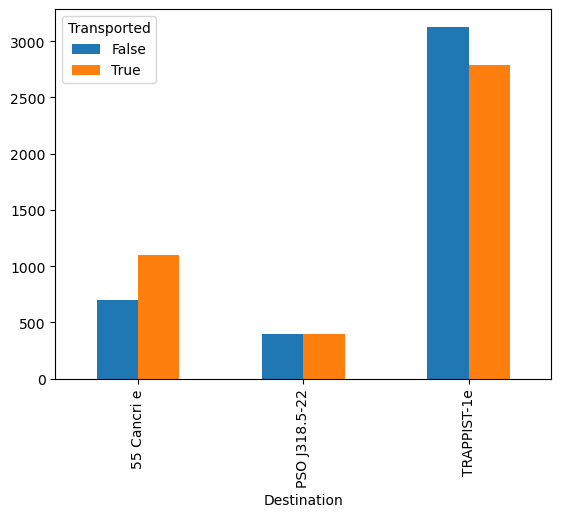

In [42]:
X_train_full.groupby(['Transported', 'Destination']).count()['PassengerId'].unstack(level=0).plot.bar()

<Axes: xlabel='VIP,CryoSleep'>

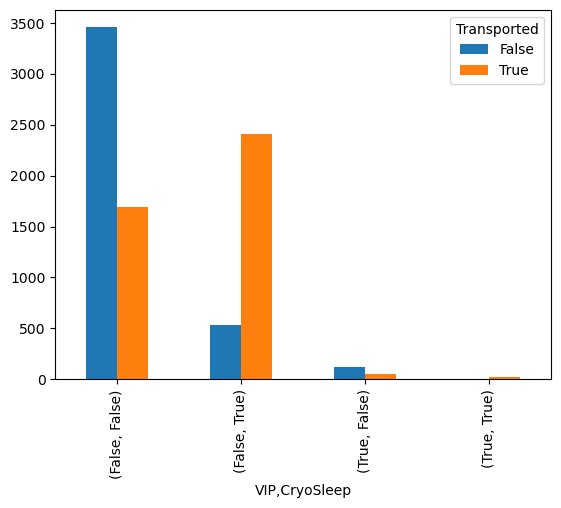

In [66]:
X_train_full.groupby(['Transported', 'VIP', 'CryoSleep']).count()['PassengerId'].unstack(level=0).plot.bar()